## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

## Dropout rate

In [5]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0, 0.1, 0.25, 0.5]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=i)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = f'dropout_rate_{str(i)}'
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0   

50000/50000 [==============================] - 2s 34us/step - loss: 0.9159 - accuracy: 0.6783 - val_loss: 1.3711 - val_accuracy: 0.5288
Epoch 47/50
50000/50000 [==============================] - 2s 34us/step - loss: 0.9029 - accuracy: 0.6840 - val_loss: 1.3751 - val_accuracy: 0.5288
Epoch 48/50
50000/50000 [==============================] - 2s 36us/step - loss: 0.8939 - accuracy: 0.6886 - val_loss: 1.3722 - val_accuracy: 0.5334
Epoch 49/50
50000/50000 [==============================] - 2s 35us/step - loss: 0.8816 - accuracy: 0.6912 - val_loss: 1.5049 - val_accuracy: 0.5039
Epoch 50/50
50000/50000 [==============================] - 2s 34us/step - loss: 0.8729 - accuracy: 0.6946 - val_loss: 1.3985 - val_accuracy: 0.5319
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________

50000/50000 [==============================] - 2s 35us/step - loss: 1.1686 - accuracy: 0.5822 - val_loss: 1.3005 - val_accuracy: 0.5375
Epoch 42/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.1556 - accuracy: 0.5865 - val_loss: 1.2948 - val_accuracy: 0.5428
Epoch 43/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.1509 - accuracy: 0.5903 - val_loss: 1.3103 - val_accuracy: 0.5350
Epoch 44/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.1409 - accuracy: 0.5924 - val_loss: 1.3250 - val_accuracy: 0.5256
Epoch 45/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.1337 - accuracy: 0.5965 - val_loss: 1.2865 - val_accuracy: 0.5447
Epoch 46/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.1225 - accuracy: 0.6012 - val_loss: 1.3048 - val_accuracy: 0.5442
Epoch 47/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.1155 - accuracy: 0.6011 - val_loss: 1.2842

50000/50000 [==============================] - 2s 33us/step - loss: 1.3839 - accuracy: 0.5056 - val_loss: 1.3473 - val_accuracy: 0.5172
Epoch 37/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.3814 - accuracy: 0.5071 - val_loss: 1.3551 - val_accuracy: 0.5165
Epoch 38/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.3695 - accuracy: 0.5138 - val_loss: 1.3445 - val_accuracy: 0.5220
Epoch 39/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.3667 - accuracy: 0.5116 - val_loss: 1.3592 - val_accuracy: 0.5121
Epoch 40/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.3604 - accuracy: 0.5164 - val_loss: 1.3365 - val_accuracy: 0.5190
Epoch 41/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.3469 - accuracy: 0.5187 - val_loss: 1.3384 - val_accuracy: 0.5156
Epoch 42/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.3464 - accuracy: 0.5185 - val_loss: 1.3327

50000/50000 [==============================] - 2s 43us/step - loss: 1.6805 - accuracy: 0.3954 - val_loss: 1.5586 - val_accuracy: 0.4528
Epoch 32/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6774 - accuracy: 0.3961 - val_loss: 1.5486 - val_accuracy: 0.4517
Epoch 33/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6716 - accuracy: 0.3985 - val_loss: 1.5417 - val_accuracy: 0.4569
Epoch 34/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6649 - accuracy: 0.4041 - val_loss: 1.5400 - val_accuracy: 0.4531
Epoch 35/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6673 - accuracy: 0.4021 - val_loss: 1.5328 - val_accuracy: 0.4565
Epoch 36/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6545 - accuracy: 0.4052 - val_loss: 1.5255 - val_accuracy: 0.4565
Epoch 37/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6460 - accuracy: 0.4107 - val_loss: 1.5242

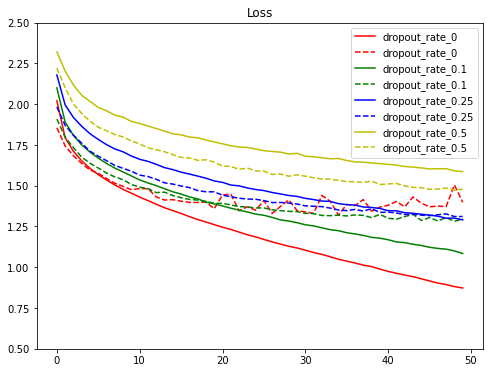

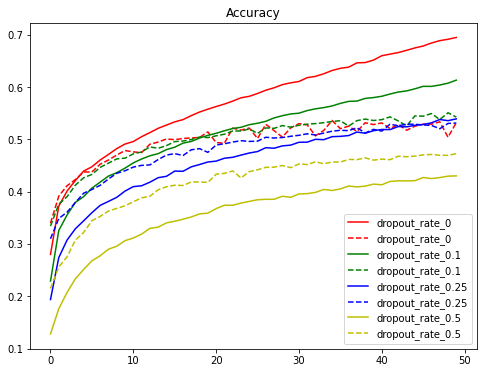

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0.5, 2.5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Adam

In [9]:
results_adam = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=i)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    exp_name_tag = f'dropout_rate_{str(i)}'
    results_adam[exp_name_tag] = {'train-loss': train_loss,
                                  'valid-loss': valid_loss,
                                  'train-acc': train_acc,
                                  'valid-acc': valid_acc}

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0   

50000/50000 [==============================] - 2s 42us/step - loss: 0.6715 - accuracy: 0.7609 - val_loss: 1.7364 - val_accuracy: 0.5158
Epoch 47/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.6715 - accuracy: 0.7596 - val_loss: 1.7833 - val_accuracy: 0.5145
Epoch 48/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.6550 - accuracy: 0.7649 - val_loss: 1.8633 - val_accuracy: 0.5078
Epoch 49/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.6476 - accuracy: 0.7677 - val_loss: 1.7659 - val_accuracy: 0.5130
Epoch 50/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.6291 - accuracy: 0.7747 - val_loss: 1.8325 - val_accuracy: 0.5219
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________

50000/50000 [==============================] - 2s 43us/step - loss: 1.1681 - accuracy: 0.5770 - val_loss: 1.3390 - val_accuracy: 0.5259
Epoch 42/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.1729 - accuracy: 0.5763 - val_loss: 1.3274 - val_accuracy: 0.5270
Epoch 43/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.1575 - accuracy: 0.5826 - val_loss: 1.3401 - val_accuracy: 0.5288
Epoch 44/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.1536 - accuracy: 0.5832 - val_loss: 1.3463 - val_accuracy: 0.5281
Epoch 45/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.1569 - accuracy: 0.5827 - val_loss: 1.3336 - val_accuracy: 0.5286
Epoch 46/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.1472 - accuracy: 0.5858 - val_loss: 1.3517 - val_accuracy: 0.5254
Epoch 47/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.1392 - accuracy: 0.5882 - val_loss: 1.3519

50000/50000 [==============================] - 2s 37us/step - loss: 1.5202 - accuracy: 0.4515 - val_loss: 1.4949 - val_accuracy: 0.4658
Epoch 37/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.5155 - accuracy: 0.4541 - val_loss: 1.4926 - val_accuracy: 0.4626
Epoch 38/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.5113 - accuracy: 0.4548 - val_loss: 1.4626 - val_accuracy: 0.4862
Epoch 39/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.5127 - accuracy: 0.4567 - val_loss: 1.4312 - val_accuracy: 0.4929
Epoch 40/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.5157 - accuracy: 0.4553 - val_loss: 1.4544 - val_accuracy: 0.4880
Epoch 41/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.5033 - accuracy: 0.4591 - val_loss: 1.4691 - val_accuracy: 0.4802
Epoch 42/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.5078 - accuracy: 0.4580 - val_loss: 1.4567

50000/50000 [==============================] - 2s 38us/step - loss: 1.9453 - accuracy: 0.2667 - val_loss: 1.9614 - val_accuracy: 0.2900
Epoch 32/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.9435 - accuracy: 0.2663 - val_loss: 1.9685 - val_accuracy: 0.2784
Epoch 33/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.9370 - accuracy: 0.2662 - val_loss: 1.9446 - val_accuracy: 0.2990
Epoch 34/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.9349 - accuracy: 0.2724 - val_loss: 1.9511 - val_accuracy: 0.3033
Epoch 35/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.9351 - accuracy: 0.2721 - val_loss: 1.9567 - val_accuracy: 0.2885
Epoch 36/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.9305 - accuracy: 0.2712 - val_loss: 1.9578 - val_accuracy: 0.2940
Epoch 37/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.9344 - accuracy: 0.2708 - val_loss: 1.9970

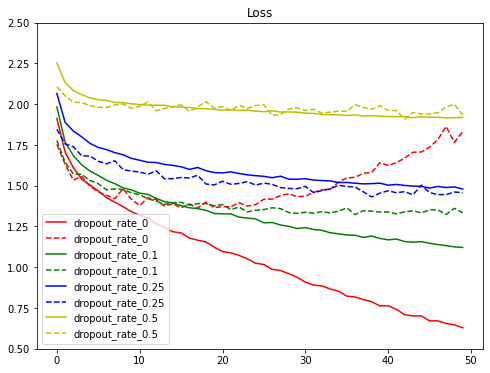

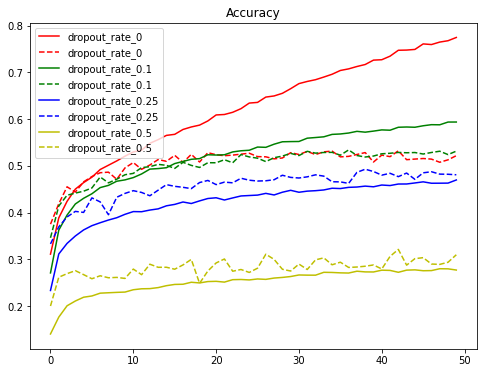

In [13]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results_adam.keys()):
    plt.plot(range(len(results_adam[cond]['train-loss'])),results_adam[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_adam[cond]['valid-loss'])),results_adam[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0.5, 2.5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_adam.keys()):
    plt.plot(range(len(results_adam[cond]['train-acc'])),results_adam[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_adam[cond]['valid-acc'])),results_adam[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()